<a href="https://colab.research.google.com/github/NicolasRodrigues23/Projeto_PostSales/blob/main/ProjetoPOV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv('ECOMM_DATA.csv')
df.shape

(51290, 24)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ROW ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Market          51290 non-null  object 
 12  Postal Code     9994 non-null   float64
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [23]:
df.head(2)

,ROW ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Shipping Cost,Profit,Order Priority
0,26341,CA-2012-124891,31/7/2012,31/7/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.65,7,0.0,933.57,7.621.845,Critical
1,26341,IN-2013-77878,5/2/2013,7/2/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3.709.395,9,0.1,923.63,-288.765,Critical


In [24]:
df.isnull().sum()

,0
ROW ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
City,0
State,0


In [25]:
#Checagem de valores unicos
df.nunique()

,0
ROW ID,51289
Order ID,25035
Order Date,1430
Ship Date,1464
Ship Mode,4
Customer ID,1590
Customer Name,795
Segment,3
City,3636
State,1094


In [26]:
#Convertendo campos em datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [27]:
#Convertendo campos em Float
df['Discount'] = df['Discount'].astype(float)
df['Shipping Cost'] = df['Shipping Cost'].astype(float)

# Analise Dos Paises com Mais Vendas
- Brasil é o oitavo Pais Com mais Vendas
- Esta bem Proximo do Reino Unido

In [28]:
#Top 10 Países em Vendas
top_10_countries = df['Country'].value_counts().nlargest(10)

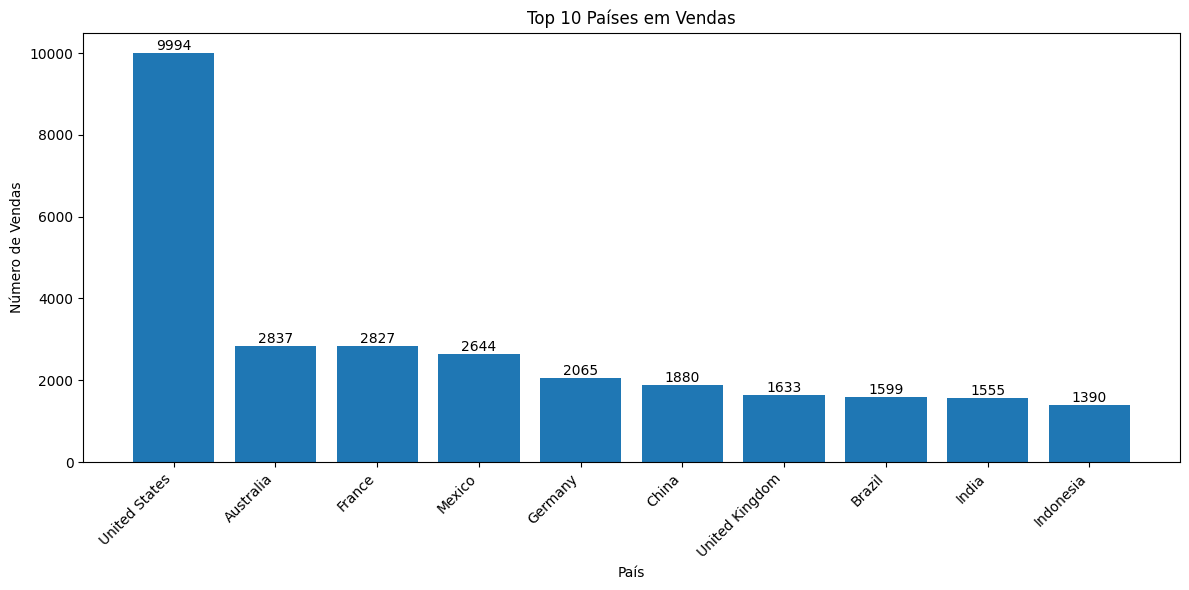

In [29]:
plt.figure(figsize=(12, 6))
plt.bar(top_10_countries.index, top_10_countries.values)
plt.xlabel('País')
plt.ylabel('Número de Vendas')
plt.title('Top 10 Países em Vendas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adiciona os valores exatos em cada barra
for i, v in enumerate(top_10_countries.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

# Analise do Tempo de Entrega
- O Brasil em geral está com o Tempo médio de entrega dentro do esperado.
- Porem na visando as nossas principais cidades temos:
  - Temos problemas com as entregas "Standard Calss", onde temos algumas Cidades passando do Tempo estipulados de entrega (Bezerros, Idaial e Vassouras).
  - Destaque negativo para a Cidade de Recife onde não estamos conseguindo cumprir os prasos estipulados nas modalidades "Same Day" e "First Class".
  - E um Destaque positivo para Curitiba que estamos conseguir fazer a entrega com um tempo médio menor que o estipulado.

In [30]:
df['Shipping Time'] = df['Ship Date'] - df['Order Date']

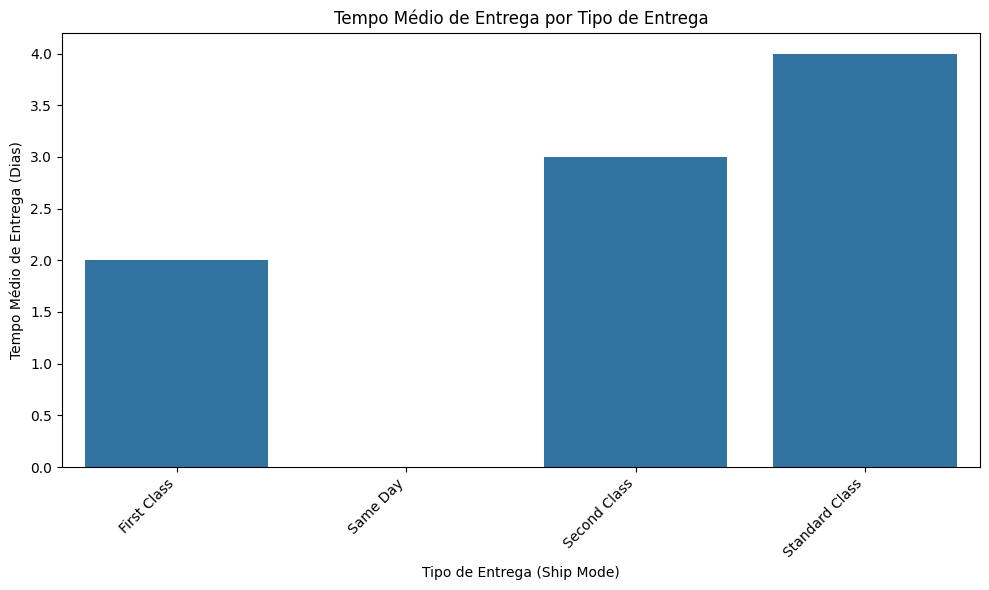

In [31]:
# Calcula o tempo médio de entrega para cada 'Ship Mode'
average_shipping_time = df.groupby('Ship Mode')['Shipping Time'].mean()

# Converte o tempo médio para dias
average_shipping_time_days = average_shipping_time.dt.days

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=average_shipping_time_days.index, y=average_shipping_time_days.values)
plt.title('Tempo Médio de Entrega por Tipo de Entrega')
plt.xlabel('Tipo de Entrega (Ship Mode)')
plt.ylabel('Tempo Médio de Entrega (Dias)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

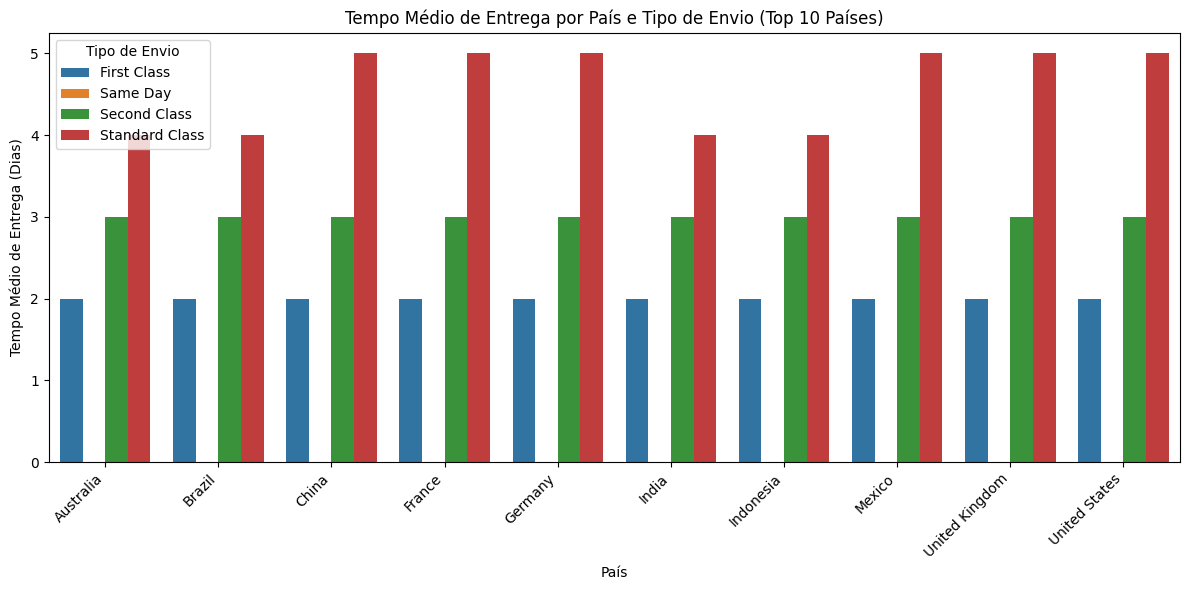

In [32]:
# Filtra os 10 países com mais vendas
top_10_countries = df['Country'].value_counts().nlargest(10).index
filtered_df = df[df['Country'].isin(top_10_countries)]

# Calcula o tempo médio de entrega por país e tipo de envio
average_shipping_time = filtered_df.groupby(['Country', 'Ship Mode'])['Shipping Time'].mean()

# Converte o tempo médio para dias
average_shipping_time_days = average_shipping_time.dt.days

# Cria o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y=average_shipping_time_days.values, hue='Ship Mode', data=average_shipping_time_days.reset_index())
plt.title('Tempo Médio de Entrega por País e Tipo de Envio (Top 10 Países)')
plt.xlabel('País')
plt.ylabel('Tempo Médio de Entrega (Dias)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Tipo de Envio')
plt.show()

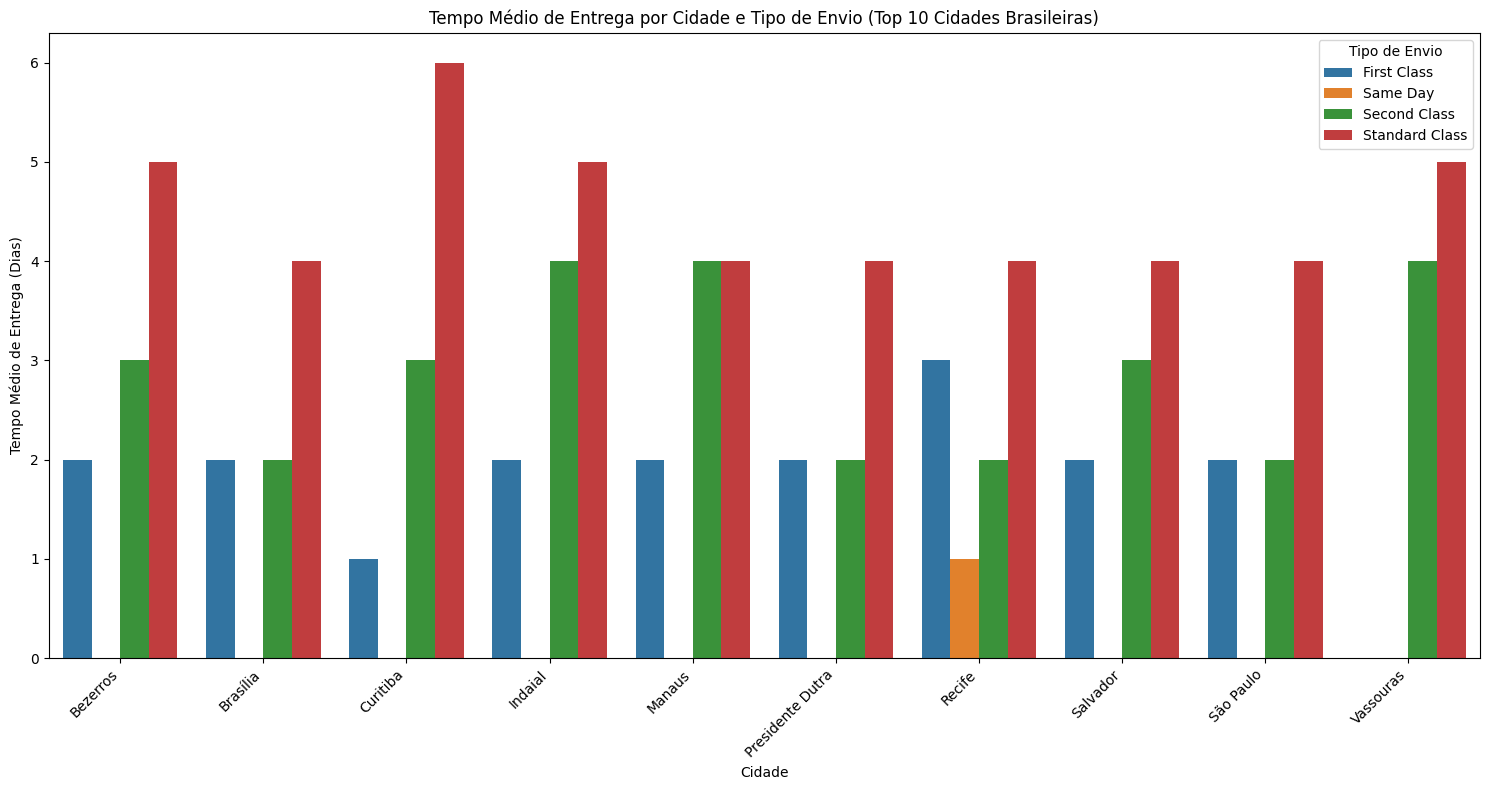

In [33]:
# Filtra as 20 cidades brasileiras com mais vendas
top_10_cities = df[df['Country'] == 'Brazil']['City'].value_counts().nlargest(10).index
filtered_df = df[df['City'].isin(top_10_cities)]

# Calcula o tempo médio de entrega por cidade e tipo de envio
average_shipping_time = filtered_df.groupby(['City', 'Ship Mode'])['Shipping Time'].mean()

# Converte o tempo médio para dias
average_shipping_time_days = average_shipping_time.dt.days

# Cria o gráfico de barras
plt.figure(figsize=(15, 8))  # Ajuste o tamanho da figura conforme necessário
sns.barplot(x='City', y=average_shipping_time_days.values, hue='Ship Mode', data=average_shipping_time_days.reset_index())
plt.title('Tempo Médio de Entrega por Cidade e Tipo de Envio (Top 10 Cidades Brasileiras)')
plt.xlabel('Cidade')
plt.ylabel('Tempo Médio de Entrega (Dias)')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()
plt.legend(title='Tipo de Envio')
plt.show()

# Relação entre Prioridade, Tipo da entrega e Tempo de entrega

In [47]:
# Calculando o tempo médio de Entrega
df['Shipping Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Group data and calculate the average shipping time
Analise_Agrupada = df.groupby(by=['Country', 'Ship Mode', 'Order Priority'])['Shipping Time'].mean().reset_index()
# Display the table for Brazil
Analise_Agrupada.loc[Analise_Agrupada['Country'] == 'Brazil']


,Country,Ship Mode,Order Priority,Shipping Time
140,Brazil,First Class,Critical,2.073171
141,Brazil,First Class,High,1.919192
142,Brazil,First Class,Medium,2.346667
143,Brazil,Same Day,Critical,0.034483
144,Brazil,Same Day,High,0.023810
145,Brazil,Same Day,Medium,0.086957
146,Brazil,Second Class,Critical,2.211538
147,Brazil,Second Class,High,2.943089
148,Brazil,Second Class,Medium,3.742857
149,Brazil,Standard Class,High,4.324324
